In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
import missingno

import warnings
warnings.filterwarnings("ignore")

In [2]:
forestFiresDataset = pd.read_csv('forestfires.csv')
forestFiresDataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


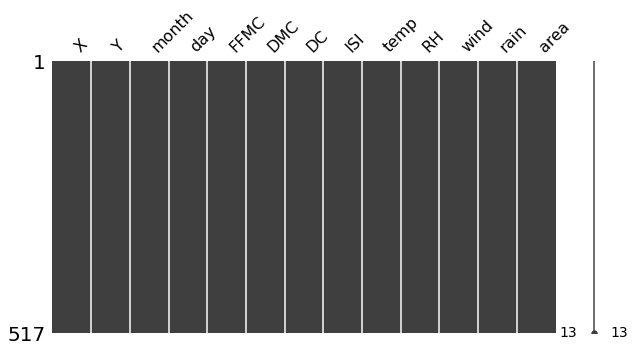

In [3]:
missingno.matrix(forestFiresDataset, figsize = (10, 5))

Од missingno матрицата можеме да увидеме дека нема податоци што недостасуваат односно имаме целосно множество.

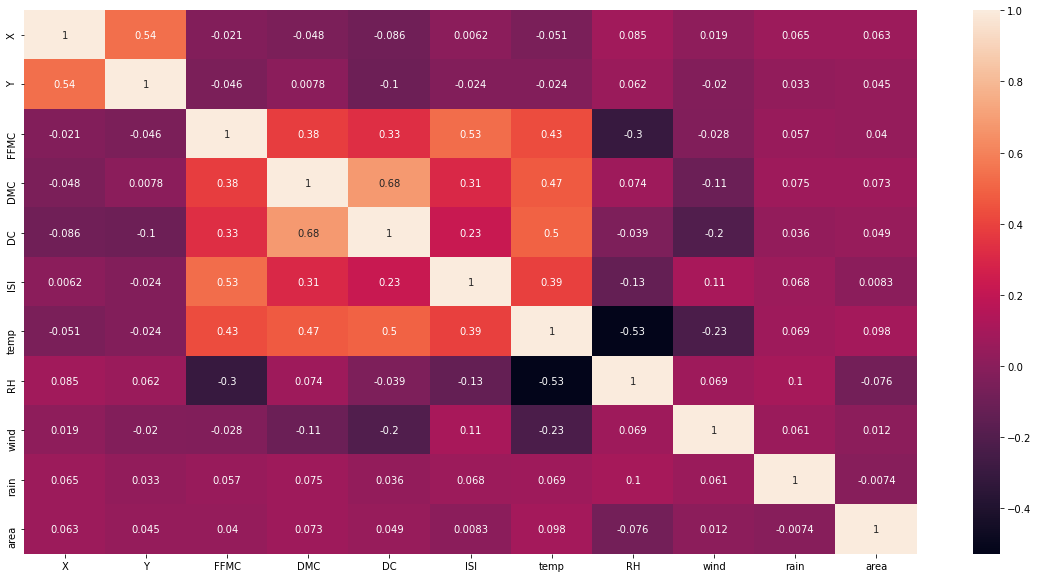

In [4]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(forestFiresDataset.corr(), annot = True, ax = ax)

Матрицата на корелација во овој случај скоро и да не ни кажува ништо. Ниту еден од елементите не е доволно линеарно зависен со area, нашата целна карактеристика.

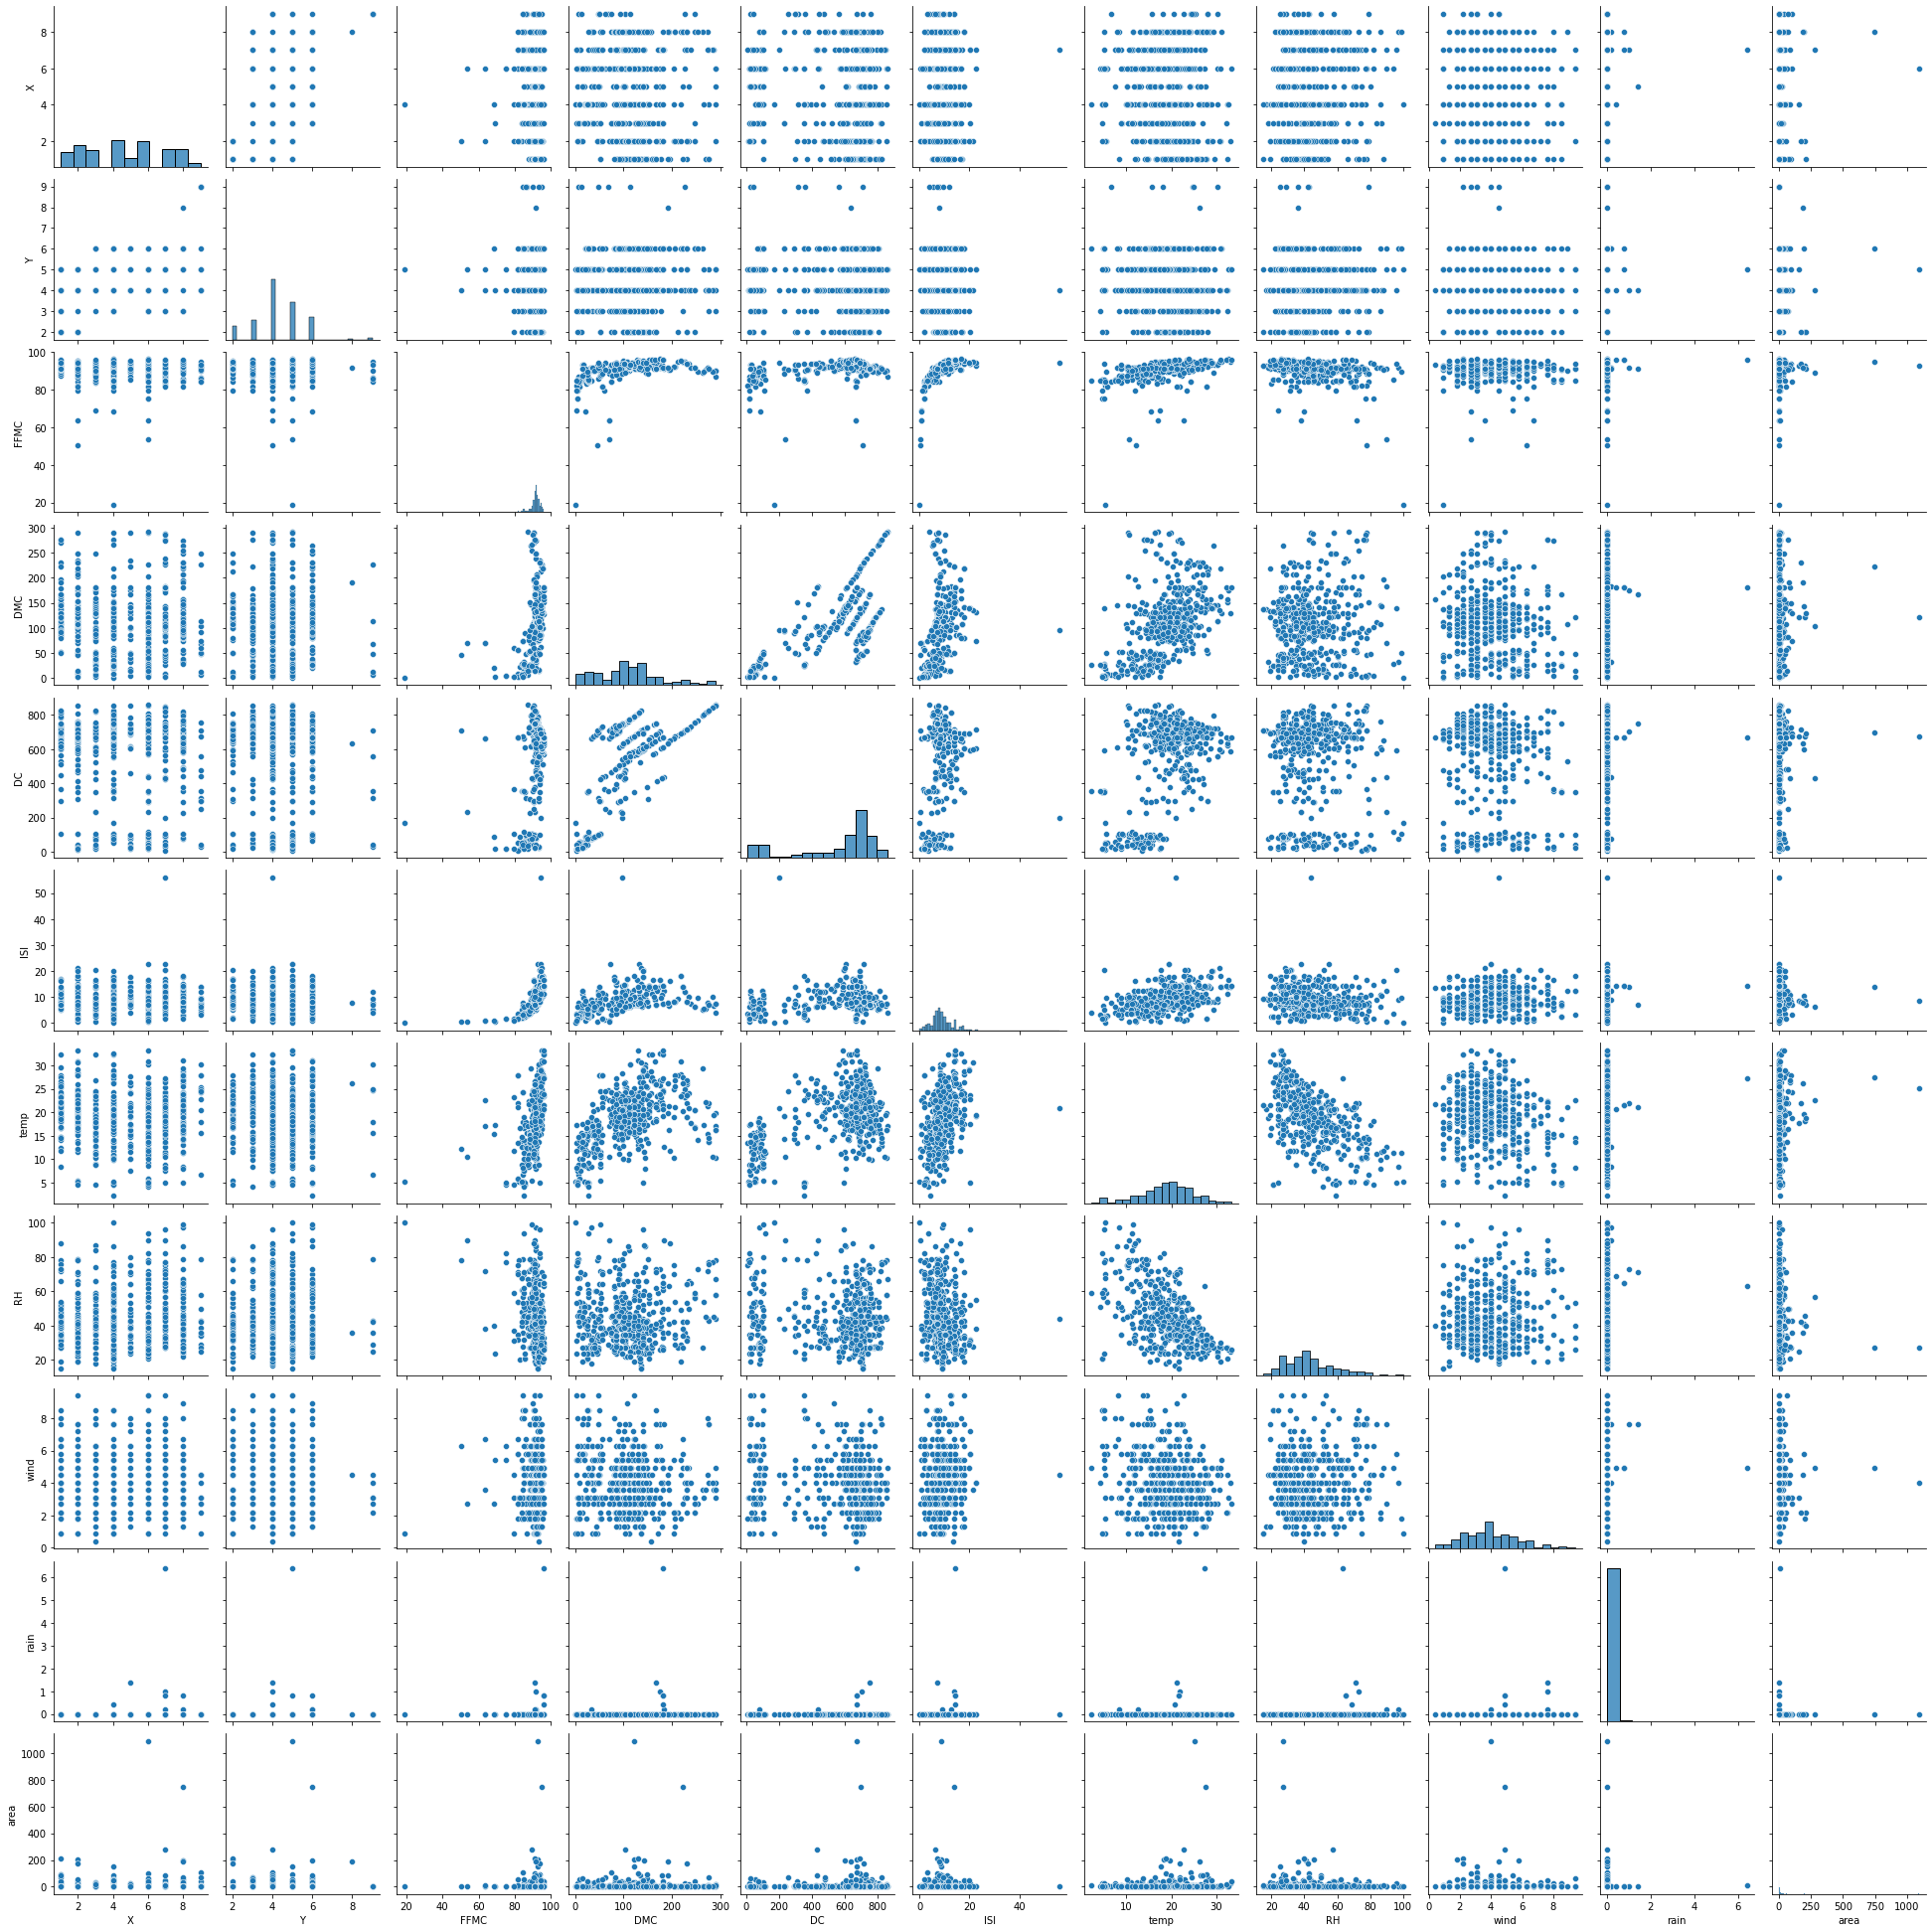

In [5]:
sns.pairplot(forestFiresDataset)

Имаме и категориски атрибути па затоа потребно е да ги енкодираме. Во случајот искористив OneHot encoding.

In [6]:
one_hot_features = pd.DataFrame(forestFiresDataset, columns=['month', 'day'])
dum_df = pd.get_dummies(one_hot_features, columns=["month", "day"] ) # postavi gi soodvetno na 0 i 1 dokolku postoi

In [7]:
forestFiresDataset_copy = forestFiresDataset.copy()
forestFiresNewDataset = pd.concat([forestFiresDataset_copy,dum_df], axis=1)

cols = list(forestFiresNewDataset.columns.values) 
cols.pop(cols.index('area')) 
forestFiresNewDataset = forestFiresNewDataset[cols+['area']].drop('month', axis=1).drop('day', axis=1)
forestFiresNewDataset

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,1,0,0,0,0,0,0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,0,0,0,0,0,1,0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,0,0,1,0,0,0,0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,1,0,0,0,0,0,0,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,1,0,0,0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,1,0,0,0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,1,0,0,0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,1,0,0,0,0,0.00


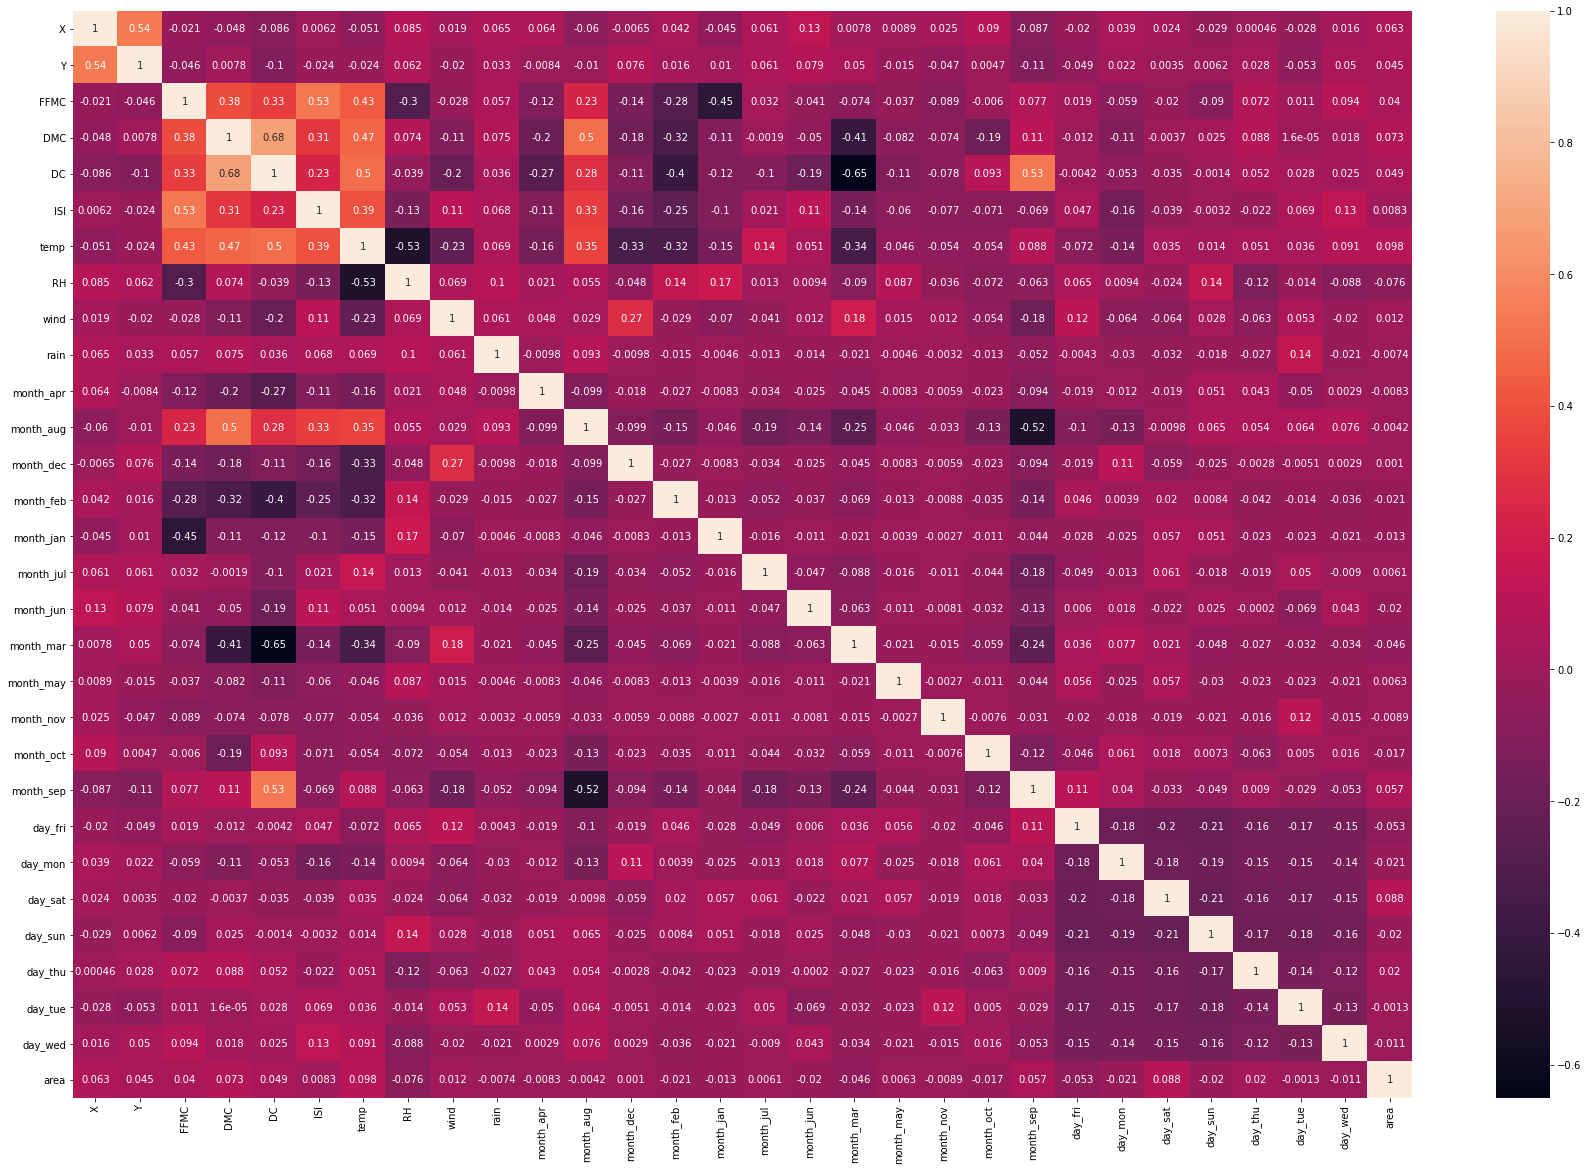

In [8]:
fig, ax = plt.subplots(figsize = (30, 20))
sns.heatmap(forestFiresNewDataset.corr(), annot = True, ax = ax)

Имаме некои измени во елементите но зависноста со area сеуште е многу мала. За да можеме понатаму да работиме со множеството, најпрвин ќе ги тргнеме екстремните вредности (outliers и noise data).

In [9]:
data_mean, data_std = np.mean(forestFiresNewDataset.area), np.std(forestFiresNewDataset.area)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in forestFiresNewDataset.area if x < lower or x > upper]
print(outliers)

[212.88, 1090.84, 746.28, 278.53]


In [10]:
for i in outliers:
    forestFiresNewDataset = forestFiresNewDataset[forestFiresNewDataset.area != i]

Сега го имаме множеството со 4 тргнати екстремни вредности. Од 517 имаме вкупно 513 примероци сега.

In [11]:
forestFiresNewDataset

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,1,0,0,0,0,0,0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,0,0,0,0,0,1,0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,0,0,1,0,0,0,0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,1,0,0,0,0,0,0,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,1,0,0,0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,1,0,0,0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,1,0,0,0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,1,0,0,0,0,0.00


In [12]:
from sklearn import preprocessing

X = forestFiresNewDataset.drop('area', axis=1)
X = preprocessing.normalize(X)
y = forestFiresNewDataset['area']

Има неколку начини за feature selection за проблеми на линеарна регресија како на пример correlation и mutual information feature selection. Во оваа лабораториска вежба токму овие две ќе ги искористиме. 

## Correlation Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features_correlation(X_train, y_train, X_test):
    fs = SelectKBest(score_func = f_regression, k = 'all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_correlation(X_train, y_train, X_test)

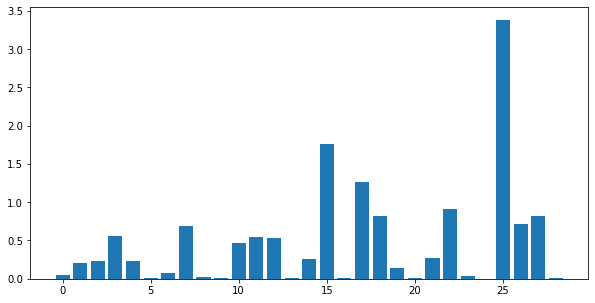

In [15]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Колку поголема вредност толку поголема зависност со area. Од графот можеме да видеме дека има неколку елементи што воопшто не влијаат врз целната карактеристика па подоцна овие можеме да ги отстранеме.

## Mutual Information Feature Selection

In [16]:
from sklearn.feature_selection import mutual_info_regression

def select_features_mutual_information(X_train, y_train, X_test):
    fs = SelectKBest(score_func = mutual_info_regression, k = 'all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_mutual_information(X_train, y_train, X_test)

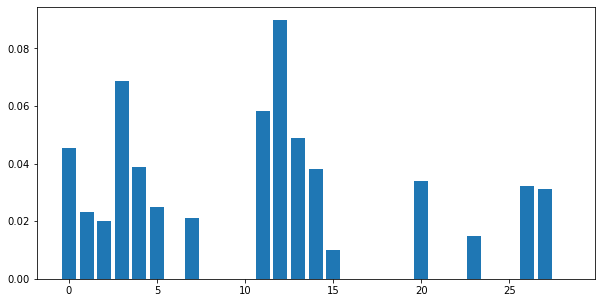

In [18]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Истото важи и за mutual information, колку поголема вредност толку поголемо влијание.

In [48]:
#labels for marking the scores in a dictionary

score = dict()
LinearRegression_NonProcesseData = 'lrnpd'
LinearRegression_CorrelatedData = 'lrcd'
LinearRegression_MIData = 'lrmid'

RidgeRegression_NonProcesseData = 'rrnpd'
RidgeRegression_CorrelatedData = 'rrcd'
RidgeRegression_MIData = 'rrmid'

LassoRegression_NonProcesseData = 'larnpd'
LassoRegression_CorrelatedData = 'lacpd'
LassoRegression_MIData = 'lamipd'

RidgeBayessianRegression_NonProcesseData = 'rrbnpd'
RidgeBayessianRegression_CorrelatedData = 'rrbcd'
RidgeBayessianRegression_MIData = 'rrbmid'

SVRegression_NonProcesseData = 'svnpd'
SVRegression_CorrelatedData = 'svcd'
SVRegression_MIData = 'svmipd'

RVRegression_NonProcesseData = 'rvnpd'
RVRegression_CorrelatedData = 'rvcd'
RVRegression_MIData = 'rvmipd'

NNRegression_NonProcesseData = 'nnnpd'
NNRegression_CorrelatedData = 'nncd'
NNRegression_MIData = 'nnmid'

## Linear regression using non processed data

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[LinearRegression_NonProcesseData] = mean_squared_error(y_test, y_pred)

730.3273100728172 27.02456863805262
13.70026278989485


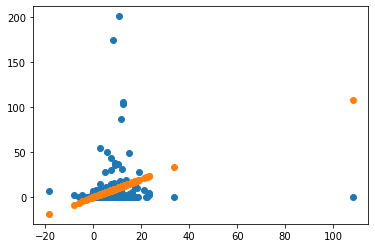

In [21]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Correlation data for Linear regression

In [22]:
forestFiresNewDataset_correlation = forestFiresNewDataset.copy()
forestFiresNewDataset_correlation.rename(columns = {old_name : new_name for old_name, new_name in zip(forestFiresNewDataset.columns, range(0, len(forestFiresNewDataset)))}, inplace=True)

In [23]:
forestFiresNewDataset_correlation.drop([0, 1, 2, 4, 5, 6, 8, 9, 13, 16, 19, 20, 23, 24, 28], axis=1, inplace=True)
forestFiresNewDataset_correlation

,3,7,10,11,12,14,15,17,18,21,22,25,26,27,29
0,26.2,51,0,0,0,0,0,1,0,0,1,0,0,0,0.00
1,35.4,33,0,0,0,0,0,0,0,0,0,0,0,1,0.00
2,43.7,33,0,0,0,0,0,0,0,0,0,0,0,0,0.00
3,33.3,97,0,0,0,0,0,1,0,0,1,0,0,0,0.00
4,51.3,99,0,0,0,0,0,1,0,0,0,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,56.7,32,0,1,0,0,0,0,0,0,0,1,0,0,6.44
513,56.7,71,0,1,0,0,0,0,0,0,0,1,0,0,54.29
514,56.7,70,0,1,0,0,0,0,0,0,0,1,0,0,11.16
515,146.0,42,0,1,0,0,0,0,0,0,0,0,0,0,0.00


In [24]:
X_corr = forestFiresNewDataset_correlation.drop(29, axis=1)
X_corr = preprocessing.normalize(X_corr)
y_corr = forestFiresNewDataset_correlation[29]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_correlation(X_train, y_train, X_test)

model = LinearRegression()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[LinearRegression_CorrelatedData] = mean_squared_error(y_test, y_pred)

641.9281459046856 25.336300951494195
11.925761896697194


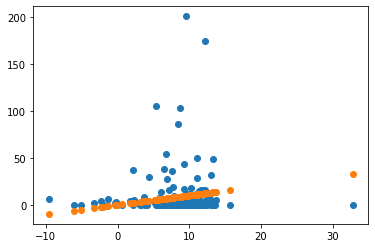

In [26]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Mutual information data

In [27]:
forestFiresNewDataset_mi = forestFiresNewDataset.copy()
forestFiresNewDataset_mi.rename(columns = {old_name : new_name for old_name, new_name in zip(forestFiresNewDataset.columns, range(0, len(forestFiresNewDataset)))}, inplace=True)

In [28]:
forestFiresNewDataset_mi.drop([6, 8, 9, 13, 15, 16, 18, 20, 21, 25, 26, 27, 28], axis=1, inplace=True)
forestFiresNewDataset_mi

,0,1,2,3,4,5,7,10,11,12,14,17,19,22,23,24,29
0,7,5,86.2,26.2,94.3,5.1,51,0,0,0,0,1,0,1,0,0,0.00
1,7,4,90.6,35.4,669.1,6.7,33,0,0,0,0,0,0,0,0,0,0.00
2,7,4,90.6,43.7,686.9,6.7,33,0,0,0,0,0,0,0,0,1,0.00
3,8,6,91.7,33.3,77.5,9.0,97,0,0,0,0,1,0,1,0,0,0.00
4,8,6,89.3,51.3,102.2,9.6,99,0,0,0,0,1,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,32,0,1,0,0,0,0,0,0,0,6.44
513,2,4,81.6,56.7,665.6,1.9,71,0,1,0,0,0,0,0,0,0,54.29
514,7,4,81.6,56.7,665.6,1.9,70,0,1,0,0,0,0,0,0,0,11.16
515,1,4,94.4,146.0,614.7,11.3,42,0,1,0,0,0,0,0,0,1,0.00


In [29]:
X_mi = forestFiresNewDataset_mi.drop(29, axis=1)
X_mi = preprocessing.normalize(X_mi)
y_mi = forestFiresNewDataset_mi[29]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y_mi, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_mutual_information(X_train, y_train, X_test)

model = LinearRegression()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[LinearRegression_MIData] = mean_squared_error(y_test, y_pred)

643.2737440954935 25.362841798495165
12.10153130537332


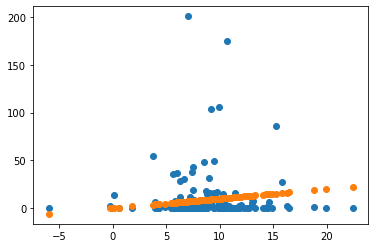

In [31]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Ridge regression using non processed data

In [33]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = Ridge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RidgeRegression_NonProcesseData] = mean_squared_error(y_test, y_pred)

631.644924353991 25.132547112340024
11.608698107994702


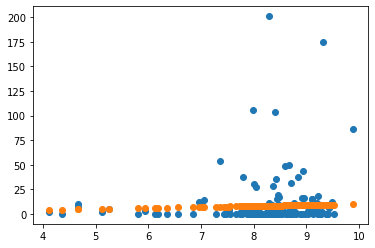

In [34]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Ridge using correlation features

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_correlation(X_train, y_train, X_test)

model = Ridge()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RidgeRegression_CorrelatedData] = mean_squared_error(y_test, y_pred)

629.0604841825597 25.08107821012804
11.52984478953188


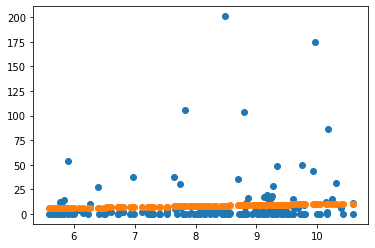

In [36]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Ridge using MI info

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y_mi, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_mutual_information(X_train, y_train, X_test)

model = Ridge()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RidgeRegression_MIData] = mean_squared_error(y_test, y_pred)

631.6072202192881 25.1317969954257
11.607922964739892


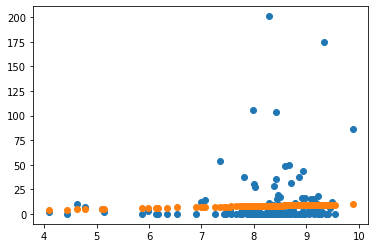

In [38]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Lasso using non processed data

In [39]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[LassoRegression_NonProcesseData] = mean_squared_error(y_test, y_pred)

635.997157758552 25.21898407467184
11.607129994855084


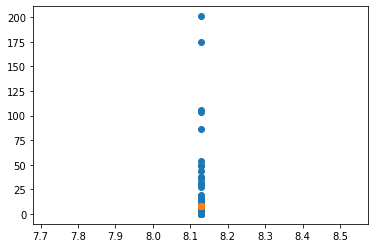

In [40]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Lasso and correlation features

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_correlation(X_train, y_train, X_test)

model = Lasso()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[LassoRegression_CorrelatedData] = mean_squared_error(y_test, y_pred)

635.997157758552 25.21898407467184
11.607129994855084


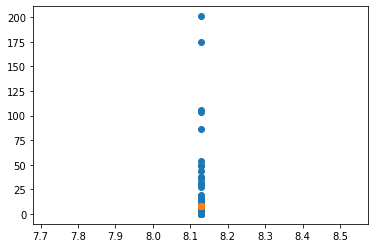

In [42]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Lasso using MI features

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y_mi, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_mutual_information(X_train, y_train, X_test)

model = Lasso()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[LassoRegression_MIData] = mean_squared_error(y_test, y_pred)

635.997157758552 25.21898407467184
11.607129994855084


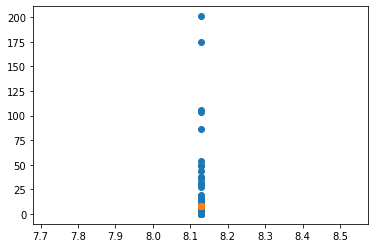

In [44]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Ridge Bayesian using non processed data

In [45]:
from sklearn.linear_model import BayesianRidge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = BayesianRidge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RidgeBayessianRegression_NonProcesseData] = mean_squared_error(y_test, y_pred)

635.9956766823167 25.218954710342707
11.607115990614723


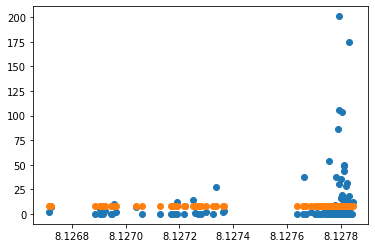

In [46]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Ridge Bayesian using correlated data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_correlation(X_train, y_train, X_test)

model = BayesianRidge()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RidgeBayessianRegression_CorrelatedData] = mean_squared_error(y_test, y_pred)

634.8378377255269 25.195988524476014
11.599988581576126


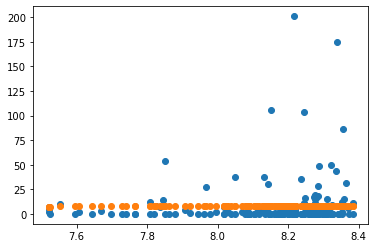

In [50]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Ridge Bayesian using MI data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y_mi, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_mutual_information(X_train, y_train, X_test)

model = BayesianRidge()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RidgeBayessianRegression_MIData] = mean_squared_error(y_test, y_pred)

635.9956676529392 25.218954531323046
11.607115917991422


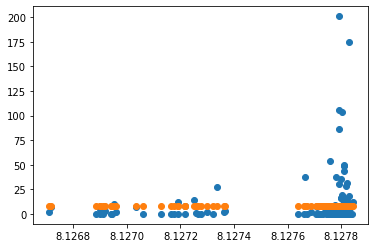

In [52]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Support Vector Regression - SVR using non processed data

In [53]:
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[SVRegression_NonProcesseData] = mean_squared_error(y_test, y_pred)

704.8981916493477 26.549918863328898
8.948707720145885


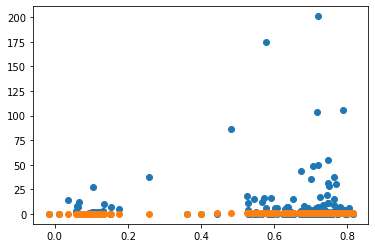

In [54]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Support Vector Regression - SVR using correlated data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_correlation(X_train, y_train, X_test)

model = SVR()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[SVRegression_CorrelatedData] = mean_squared_error(y_test, y_pred)

705.9949054525196 26.570564643088026
8.937295240433688


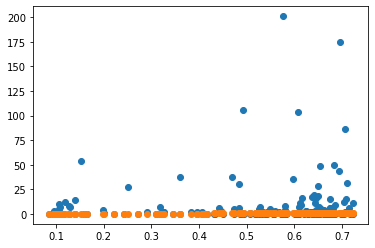

In [56]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Support Vector Regression - SVR using MI data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y_mi, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_mutual_information(X_train, y_train, X_test)

model = SVR()
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[SVRegression_MIData] = mean_squared_error(y_test, y_pred)

704.9171368763372 26.55027564595775
8.949568566442105


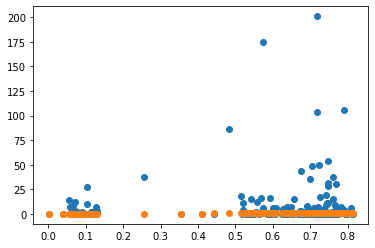

In [58]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Relevance Vector Regression - SVR using non processed data

In [59]:
#uncomment for install
#!pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip

In [60]:
from skrvm import RVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = RVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RVRegression_NonProcesseData] = mean_squared_error(y_test, y_pred)

634.0872688458841 25.181089508714354
11.503683796143303


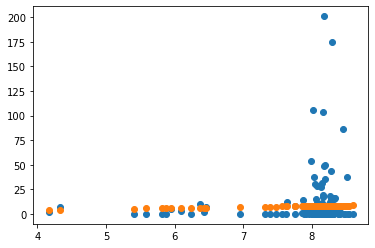

In [61]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Relevance Vector Regression - SVR using correlated data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_correlation(X_train, y_train, X_test)

model = RVR(kernel='linear')
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RVRegression_CorrelatedData] = mean_squared_error(y_test, y_pred)

632.8029486639974 25.15557490227559
11.511254146628843


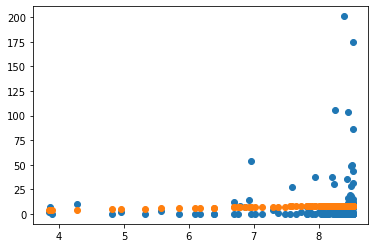

In [63]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Relevance Vector Regression - SVR using MI data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y_mi, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_mutual_information(X_train, y_train, X_test)

model = RVR(kernel='linear')
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[RVRegression_MIData] = mean_squared_error(y_test, y_pred)

634.1777329701242 25.182885715702326
11.50436816736498


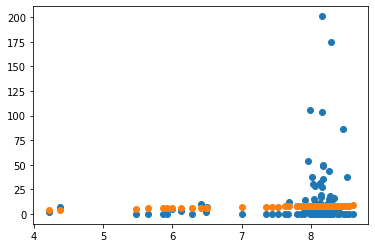

In [65]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Neural Network Regression - NNR using unprocessed data

In [66]:
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = MLPRegressor(random_state=1, max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[NNRegression_NonProcesseData] = mean_squared_error(y_test, y_pred)

632.9299780370761 25.158099650750177
11.608139006833332


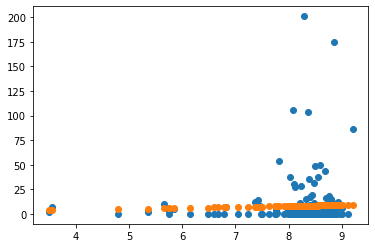

In [67]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Neural Network Regression - NNR using correlated data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_correlation(X_train, y_train, X_test)

model = MLPRegressor(random_state=1, max_iter=500)
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[NNRegression_CorrelatedData] = mean_squared_error(y_test, y_pred)

631.886111281549 25.13734495290919
11.612471080877453


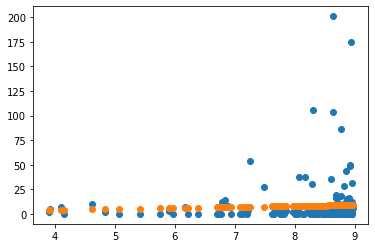

In [69]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

## Neural Network Regression - NNR using MI data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y_mi, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features_mutual_information(X_train, y_train, X_test)

model = MLPRegressor(random_state=1, max_iter=500)
model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)
print(mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5)
print(mean_absolute_error(y_test, y_pred))
score[NNRegression_MIData] = mean_squared_error(y_test, y_pred)

632.945494797942 25.158408033855043
11.577881429224322


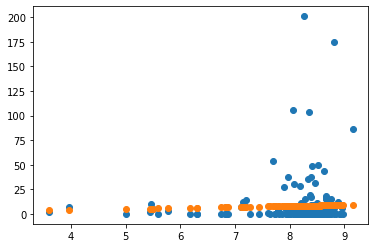

In [71]:
plt.scatter(y_pred, y_test)
plt.scatter(y_pred, y_pred)

In [74]:
score_sorted = {k:v for k, v in sorted(score.items(), key = lambda item: item[1])}

In [80]:
score_sorted

{'nncd': 631.886111281549,
 'rvcd': 632.8029486639974,
 'nnnpd': 632.9299780370761,
 'nnmid': 632.945494797942,
 'rvnpd': 634.0872688458841,
 'rvmipd': 634.1777329701242,
 'rrbcd': 634.8378377255269,
 'rrbmid': 635.9956676529392,
 'svnpd': 704.8981916493477,
 'svmipd': 704.9171368763372,
 'svcd': 705.9949054525196}

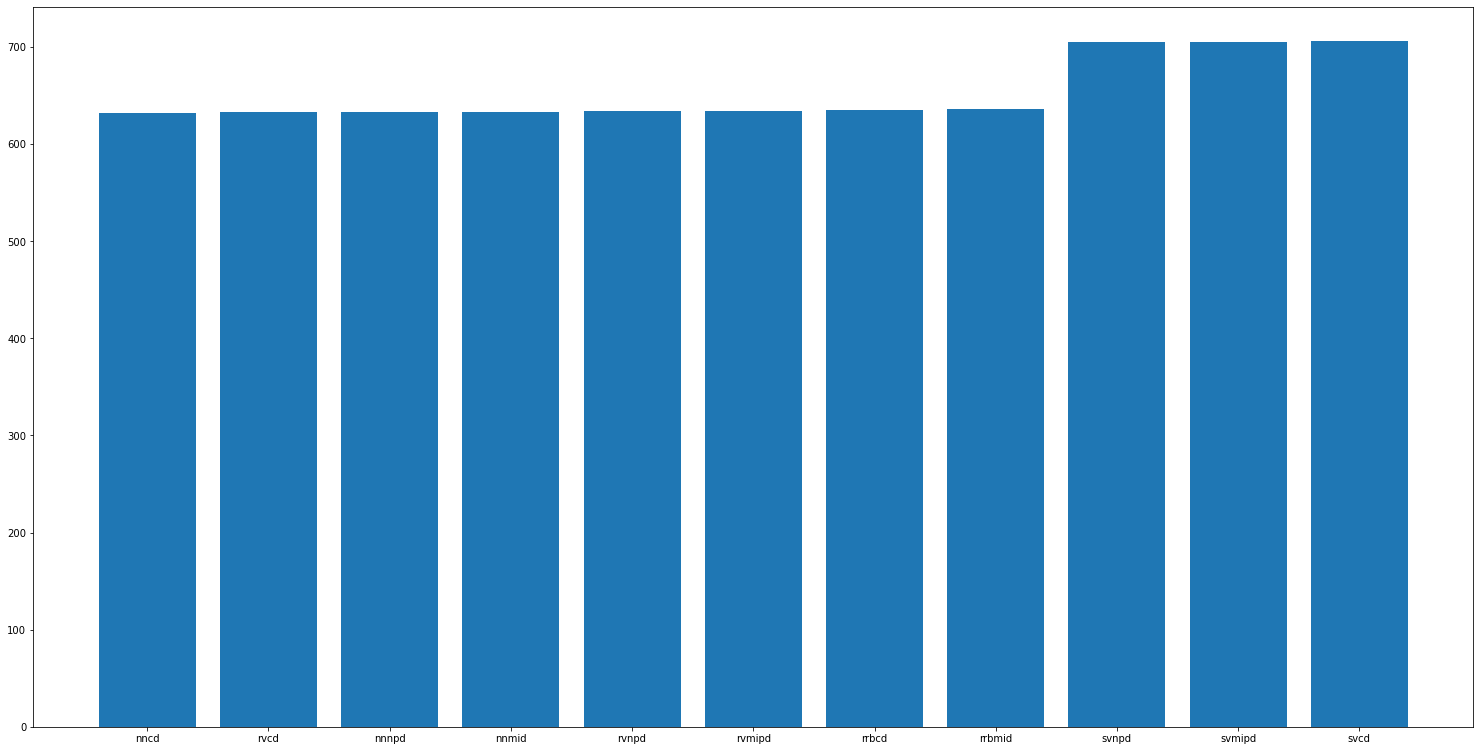

In [81]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(list(score_sorted.keys()),list(score_sorted.values()))
plt.show()

Од графот се гледа дека регресијата со невронски мрежи со features од correlation feature selection ни нуди најмал MSE. Во случајот е 631 што значи дека RMSE ќе изнесува околу 25 односно просечно имаме грешка од 25 хектари. Општо гледано невронските мрежи добро функционираат и со другите податоци (mutual information и unprocessed). Најлош скор има Support Vector со корелирани features.